# AlexNet model 

### AlexNet with 2 categories (US and non-US)

## Get packages

In [113]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A
import cv2

from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import torchvision.models as models
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

## Paths

In [114]:
TRAIN_PATH = 'archive/classification/us/train'
TEST_PATH = 'archive/classification/us/test'
VALID_PATH = 'archive/classification/us/validate'

In [115]:
input_size = (3,227,227)

## Load and Prepare Images

In [116]:


# # divisible with 520: 2, 4, 5, 8, 10, 13, 20, 26, 40, 52, 65, 104, 130, 260
train_batchsize = 52
# # divisible with 104: 2, 4, 8, 13, 26, 52
valid_batchsize = 13


train_datagen = ImageDataGenerator(rescale=1./255
)

validation_datagen = ImageDataGenerator(rescale=1./255)
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=True,
         batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=True,
         batch_size=valid_batchsize,
        class_mode='categorical')


Found 520 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


## Make the model

In [79]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
# model.add(Dropout(0.25))
model.add(Dropout(0.15))


# 2nd Fully Connected Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
# model.add(Dropout(0.1))
model.add(Dropout(0.1))


# 3rd Fully Connected Layer
model.add(Dense(50))
model.add(Activation('relu'))
# Add Dropout
# model.add(Dropout(0.2))
model.add(Dropout(0.2))


# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 54, 54, 32)        11648     
                                                                 
 activation_80 (Activation)  (None, 54, 54, 32)        0         
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 17, 17, 64)        247872    
                                                                 
 activation_81 (Activation)  (None, 17, 17, 64)        0         
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                               

In [117]:
## Un model mai simplu


model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
 
model.add(Dense(2, activation='softmax'))  
  
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 activation_109 (Activation  (None, 225, 225, 32)      0         
 )                                                               
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 activation_110 (Activation  (None, 110, 110, 64)      0         
 )                                                               
                                                     

In [118]:
# Compile the model
model.compile(
#               loss=keras.losses.CategoricalCrossentropy(),
              loss=keras.losses.BinaryFocalCrossentropy(),
              optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001, decay=1e-03, momentum=0.9),
#               optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-03), 
              metrics=['accuracy'])

In [43]:
train_generator.class_indices

{'US': 0, 'non-US': 1}

## Train the model

In [119]:
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        if isinstance(lr, tf.Variable) or tf.is_tensor(lr):
            lr = tf.keras.backend.get_value(lr)
        print(f" Epoch {epoch+1}: Learning rate is {lr:.6f}")

In [120]:
# Se antreneaza modelul
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model_us_alexnet.h5', verbose=1, save_best_only=True)
steps = train_generator.samples//train_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=4, min_lr=0.00001, verbose=1)
callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    reduce_lr,
    LearningRateLogger(),
    checkpoiter

]

results = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    steps_per_epoch = steps,
                    shuffle=True,
                    epochs=25, 
                    callbacks=callbacks,
                    verbose=1
                   )

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 5.8574 - accuracy: 0.5712 Epoch 1: Learning rate is 0.001000

Epoch 1: val_loss improved from inf to 5.42350, saving model to model_us_alexnet.h5
10/10 [==============================] - 48s 5s/step - loss: 5.8574 - accuracy: 0.5712 - val_loss: 5.4235 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 3.8345 - accuracy: 0.9462 Epoch 2: Learning rate is 0.001000

Epoch 2: val_loss improved from 5.42350 to 1.95820, saving model to model_us_alexnet.h5
10/10 [==============================] - 45s 4s/step - loss: 3.8345 - accuracy: 0.9462 - val_loss: 1.9582 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 1.5426 - accuracy: 0.9788 Epoch 3: Learning rate is 0.001000

Epoch 3: val_loss improved from 1.95820 to 0.96220, saving model to model_us_alexnet.h5
10/10 [==============================] - 43s 4s/step - loss: 1.542

Epoch 23/25
10/10 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 1.0000 Epoch 23: Learning rate is 0.000010

Epoch 23: val_loss improved from 0.07765 to 0.07526, saving model to model_us_alexnet.h5
10/10 [==============================] - 21s 2s/step - loss: 0.0798 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 24/25
10/10 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 1.0000 Epoch 24: Learning rate is 0.000010

Epoch 24: val_loss improved from 0.07526 to 0.07305, saving model to model_us_alexnet.h5
10/10 [==============================] - 21s 2s/step - loss: 0.0761 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 25/25
10/10 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9981 Epoch 25: Learning rate is 0.000010

Epoch 25: val_loss improved from 0.07305 to 0.07052, saving model to model_us_alexnet.h5
10/10 [==============================] - 21s 

## Results

In [127]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  1.0
Loss Score =  0.07052476704120636


### During training

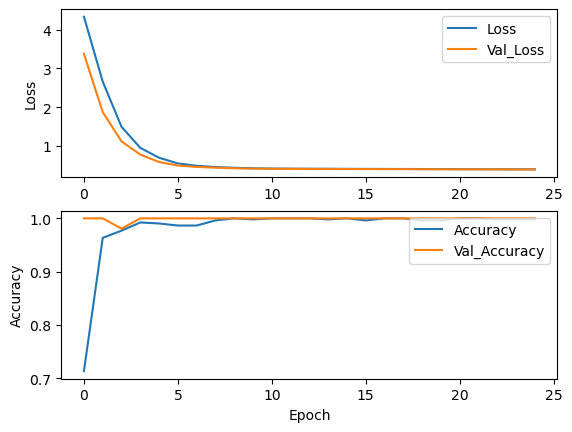

In [112]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"]
plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"]
acc_val_curve = results.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Test the model

In [92]:
# divisible with 70: 2, 5, 7, 10, 14, 35 
test_batch_size = 10

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
    batch_size=test_batch_size,
    shuffle=False,
class_mode='categorical')

scores = model.evaluate(test_generator,workers=12)
target_names = list(test_generator.class_indices.keys())

Found 70 images belonging to 2 classes.
7/7 [==============================] - 1s 145ms/step - loss: 0.6404 - accuracy: 1.0000


In [58]:
target_names = list(test_generator.class_indices.keys())
print(target_names)

['US', 'non-US']


### Make prediction

In [128]:
test_generator.reset()

Y_pred = model.predict(test_generator, verbose=1)

y_pred = np.argmax(Y_pred, axis=-1)
classes = test_generator.classes

print(classes)
print(y_pred)

print(sum(y_pred==classes)/len(test_generator.classes))

7/7 [==============================] - 1s 139ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1.0


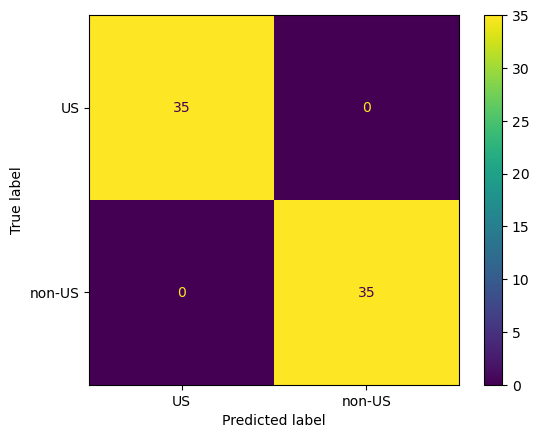

In [121]:
# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()

In [122]:
TN, FP, FN, TP = cm.ravel()


In [106]:

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [107]:
def Average(FP):
    return sum(FP) / len(FP)
FP=Average(FP)

In [108]:

def Average1(FN):
    return sum(FN) / len(FN)
FN=Average1(FN)

In [109]:
def Average2(TP):
    return sum(TP) / len(TP)
TP=Average2(TP)

In [110]:
def Average3(TN):
    return sum(TN) / len(TN)
TN=Average3(TN)

In [123]:

print("True positive=",TP)
print("True Negative=",TN)
print("False positive=",FP)
print("False Negative=",FN)

True positive= 35
True Negative= 35
False positive= 0
False Negative= 0


In [124]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
#F1_SCORE
FSCO=(2*TP) / ((2*TP) +FP + FN) 
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [125]:
print("sensitivity=",TPR*100,"%")
print("precision=",PPV*100,"%")
print("Specificity=",TNR*100,"%")
print("F-score=",FSCO*100,"%")
print("ACCURACY=",ACC*100,"%")
print("FNR=",FNR*100,"%")
print("FPR=",FPR*100,"%")
print("NPV=",NPV*100,"%")

sensitivity= 100.0 %
precision= 100.0 %
Specificity= 100.0 %
F-score= 100.0 %
ACCURACY= 100.0 %
FNR= 0.0 %
FPR= 0.0 %
NPV= 100.0 %
